In [24]:
from importlib import reload
from copy import deepcopy
import numpy as np
import matplotlib.pyplot as plt

import qiskit as qk
from qiskit import IBMQ
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit import transpile, execute
from qiskit.tools.monitor import job_monitor
from qiskit.providers.aer import QasmSimulator
from qiskit.providers.ibmq.managed import IBMQJobManager
from qiskit.circuit.library import HGate, CXGate, XGate, MCMTVChain, MCMT

In [2]:
import tools as t
reload(t)
from tools import counts, probs, job_id, list_jobs

In [3]:
IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q')
sim = qk.Aer.get_backend('qasm_simulator')
manila = provider.get_backend('ibmq_manila')
manila_sim = QasmSimulator.from_backend(manila)

In [4]:
list_jobs(manila)

  0 2021-12-19 11:42:09 61bf1a91d6d3bc2d77d2b7f0 DONE
  1 2021-12-18 22:20:41 61be5eb92ac6dd773a4c8000 DONE
  2 2021-12-18 21:58:55 61be599f06351995b9a7a90e DONE
  3 2021-12-18 21:57:29 61be594973db890f4e671990 DONE
  4 2021-12-18 21:34:44 61be53f40e8ecb52391998aa DONE
  5 2021-12-18 21:32:59 61be538b73db89471f671985 DONE
  6 2021-12-18 21:31:56 61be534d0635193098a7a8fc DONE
  7 2021-12-18 21:30:15 61be52e7049a230a26d1990a DONE
  8 2021-12-18 21:26:53 61be521d0e8ecb78e01998a4 DONE
  9 2021-12-18 19:41:28 61be3968e8670011df9fee07 DONE


Figure(507.997x325.08)
Figure(417.879x264.88)


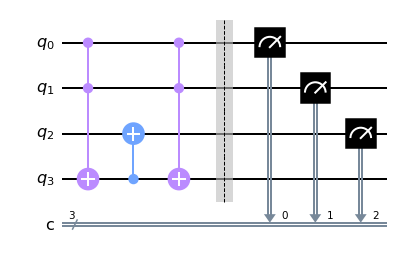

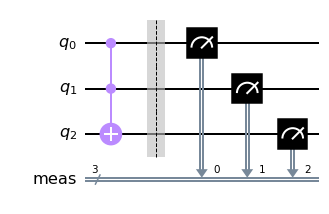

In [5]:
qr0 = QuantumRegister(4, 'q')
cr0 = ClassicalRegister(3, 'c')
qc0 = QuantumCircuit(qr0, cr0)
qc0.compose(MCMTVChain('x', 2, 1), inplace=True)
qc0.barrier()
qc0.measure(qr0[:3], cr0)
print(qc0.draw(output='mpl'))

qc1 = MCMT('x', 2, 1)
qc1.measure_all()
print(qc1.draw(output='mpl'))

In [6]:
print(counts(execute(qc0, backend=sim, shots=20000)))
print(counts(execute(qc1, backend=sim, shots=20000)))

{'000': 20000}
{'000': 20000}


In [7]:
# job = execute([qc0, qc1], backend=manila, shots=20000)
job_id(job)

NameError: name 'job' is not defined

In [ ]:
c0, c1 = counts(manila.retrieve_job('61bf1a91d6d3bc2d77d2b7f0'))
print(f'c0 prob of bit error {sum(probs(c0)[1:])*100:.2f}%')
print(f'c1 prob of bit error {sum(probs(c1)[1:])*100:.2f}%')

In [ ]:
transpiled0, transpiled1 = job.circuits()
print(transpiled0.draw(output='mpl'))
print(transpiled1.draw(output='mpl'))

In [ ]:
print(MCMTVChain('x', 2, 1).draw(output='mpl'))
print(MCMTVChain('x', 4, 1).draw(output='mpl'))
print(MCMTVChain('x', 5, 1).draw(output='mpl'))
print(MCMTVChain('x', 6, 1).draw(output='mpl'))

In [ ]:
MCMTVChain('x', 6, 1).decompose().decompose().depth()

In [41]:
def max_depth(qc):
    last_depth = 0
    for i in range(3):
        qc = qc.decompose()
        depth = qc.depth()
        if depth == last_depth:
            break
    return depth

def max_decompose(qc):
    last_depth = 0
    for i in range(3):
        qc = qc.decompose()
        depth = qc.depth()
        if depth == last_depth:
            break
    return qc

In [ ]:
qc = MCMTVChain('x', 6, 1)
qc = qc.decompose()

In [ ]:
max_depth(MCMTVChain('x', 6, 1))

In [ ]:
max_depth(MCMT('x', 6, 1))

In [29]:
N = 12
control_bits = np.arange(1, N, dtype=int)
depths_mcmt = np.zeros(len(control_bits), dtype=int)
depths_mcmtvchain = np.zeros(len(control_bits), dtype=int)
for i in range(1, N):
    depths_mcmt[i-1] = max_depth(MCMT('x', i, 1))
    depths_mcmtvchain[i-1] = max_depth(MCMTVChain('x', i, 1))

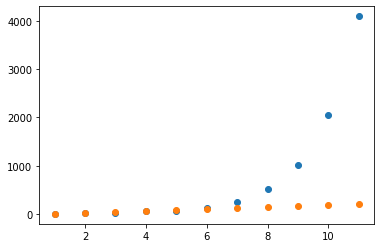

In [30]:
plt.plot(control_bits, depths_mcmt, 'o')
plt.plot(control_bits, depths_mcmtvchain, 'o')

In [10]:
max_depth(MCMT('x', 3, 1))

27

In [11]:
n = 4
print(2**(n-1)-1+2**(n-1)-2)

13


In [16]:
qr = QuantumRegister(1)
qc = QuantumCircuit(qr)
qc.append(XGate().power(1/4), qr)
qc.draw()

┌────────┐
q3: ┤ x^0.25 ├
    └────────┘

In [34]:
qr = QuantumRegister(4, 'q')
qc = QuantumCircuit(qr)
V = XGate().power(1/4).control(1)
Vdag = XGate().power(1/4).reverse_ops().control(1)
qc.compose(V, [0, 3], inplace=True)
qc.cx(0, 1)
qc.compose(Vdag, [1, 3], inplace=True)
qc.cx(0, 1)
qc.compose(V, [1, 3], inplace=True)
qc.cx(1, 2)
qc.compose(Vdag, [2, 3], inplace=True)
qc.cx(0, 2)
qc.compose(V, [2, 3], inplace=True)
qc.cx(1, 2)
qc.compose(Vdag, [2, 3], inplace=True)
qc.cx(0, 2)
qc.compose(V, [2, 3], inplace=True)
qc.draw()

»
q_0: ────■───────■──────────────■─────────────────────────────■────────────»
         │     ┌─┴─┐          ┌─┴─┐                           │            »
q_1: ────┼─────┤ X ├────■─────┤ X ├────■───────■──────────────┼────────────»
         │     └───┘    │     └───┘    │     ┌─┴─┐          ┌─┴─┐          »
q_2: ────┼──────────────┼──────────────┼─────┤ X ├────■─────┤ X ├────■─────»
     ┌───┴────┐     ┌───┴────┐     ┌───┴────┐└───┘┌───┴────┐└───┘┌───┴────┐»
q_3: ┤ x^0.25 ├─────┤ x^0.25 ├─────┤ x^0.25 ├─────┤ x^0.25 ├─────┤ x^0.25 ├»
     └────────┘     └────────┘     └────────┘     └────────┘     └────────┘»
«                                   
«q_0: ─────────────────■────────────
«                      │            
«q_1: ──■──────────────┼────────────
«     ┌─┴─┐          ┌─┴─┐          
«q_2: ┤ X ├────■─────┤ X ├────■─────
«     └───┘┌───┴────┐└───┘┌───┴────┐
«q_3: ─────┤ x^0.25 ├─────┤ x^0.25 ├
«          └────────┘     └────────┘

In [35]:
max_depth(qc)

62

In [36]:
max_depth(MCMT('x', 3, 1))

27

In [37]:
qc.draw()

»
q_0: ────■───────■──────────────■─────────────────────────────■────────────»
         │     ┌─┴─┐          ┌─┴─┐                           │            »
q_1: ────┼─────┤ X ├────■─────┤ X ├────■───────■──────────────┼────────────»
         │     └───┘    │     └───┘    │     ┌─┴─┐          ┌─┴─┐          »
q_2: ────┼──────────────┼──────────────┼─────┤ X ├────■─────┤ X ├────■─────»
     ┌───┴────┐     ┌───┴────┐     ┌───┴────┐└───┘┌───┴────┐└───┘┌───┴────┐»
q_3: ┤ x^0.25 ├─────┤ x^0.25 ├─────┤ x^0.25 ├─────┤ x^0.25 ├─────┤ x^0.25 ├»
     └────────┘     └────────┘     └────────┘     └────────┘     └────────┘»
«                                   
«q_0: ─────────────────■────────────
«                      │            
«q_1: ──■──────────────┼────────────
«     ┌─┴─┐          ┌─┴─┐          
«q_2: ┤ X ├────■─────┤ X ├────■─────
«     └───┘┌───┴────┐└───┘┌───┴────┐
«q_3: ─────┤ x^0.25 ├─────┤ x^0.25 ├
«          └────────┘     └────────┘

In [40]:
qc.decompose().decompose().draw()

global phase: 3π/2
     »
q_0: »
     »
q_1: »
     »
q_2: »
     »
q_3: »
     »
«     ┌─────────────────────────────────────────────────────────────────────────────────┐»
«q_0: ┤0                                                                                ├»
«     │                                                                                 │»
«q_1: ┤                                                                                 ├»
«     │  Diagonal(-0.80321+0.5957j,-0.9988-0.049068j,0.94154+0.33689j,-0.5141-0.85773j) │»
«q_2: ┤                                                                                 ├»
«     │                                                                                 │»
«q_3: ┤1                                                                                ├»
«     └─────────────────────────────────────────────────────────────────────────────────┘»
«     ┌─────────────────┐┌───────────────┐┌─────────────────┐     »
«q_0: ┤0                ├┤1              ├┤0                ├──■──»
«     │                 ││               ││                 │┌─┴─┐»
«q_1: ┤                 ├┤               ├┤                 ├┤ X ├»
«     │  multiplexer_dg ││  MCGupDiag_dg ││  multiplexer_dg │└───┘»
«q_2: ┤                 ├┤               ├┤                 ├─────»
«     │                 ││               ││                 │     »
«q_3: ┤1                ├┤0              ├┤1                ├─────»
«     └─────────────────┘└───────────────┘└─────────────────┘     »
«                                                                                        »
«q_0: ───────────────────────────────────────────────────────────────────────────────────»
«     ┌─────────────────────────────────────────────────────────────────────────────────┐»
«q_1: ┤0                                                                                ├»
«     │                                                                                 │»
«q_2: ┤  Diagonal(-0.80321+0.5957j,-0.9988-0.049068j,0.94154+0.33689j,-0.5141-0.85773j) ├»
«     │                                                                                 │»
«q_3: ┤1                                                                                ├»
«     └─────────────────────────────────────────────────────────────────────────────────┘»
«                                                                 »
«q_0: ─────────────────────────────────────────────────────────■──»
«     ┌─────────────────┐┌───────────────┐┌─────────────────┐┌─┴─┐»
«q_1: ┤0                ├┤1              ├┤0                ├┤ X ├»
«     │                 ││               ││                 │└───┘»
«q_2: ┤  multiplexer_dg ├┤  MCGupDiag_dg ├┤  multiplexer_dg ├─────»
«     │                 ││               ││                 │     »
«q_3: ┤1                ├┤0              ├┤1                ├─────»
«     └─────────────────┘└───────────────┘└─────────────────┘     »
«                                                                                        »
«q_0: ───────────────────────────────────────────────────────────────────────────────────»
«     ┌─────────────────────────────────────────────────────────────────────────────────┐»
«q_1: ┤0                                                                                ├»
«     │                                                                                 │»
«q_2: ┤  Diagonal(-0.80321+0.5957j,-0.9988-0.049068j,0.94154+0.33689j,-0.5141-0.85773j) ├»
«     │                                                                                 │»
«q_3: ┤1                                                                                ├»
«     └─────────────────────────────────────────────────────────────────────────────────┘»
«                                                                 »
«q_0: ────────────────────────────────────────────────────────────»
«     ┌─────────────────┐┌───────────────┐┌─────────────────┐     »
«q_1: ┤0                ├┤1      

In [42]:
max_decompose(MCMT('x', 3, 1)).draw()

┌────────────┐                                                           »
q_0: ┤ U(0,0,π/8) ├──────■────────────────────────■────────────────────────■──»
     ├────────────┤    ┌─┴─┐     ┌─────────────┐┌─┴─┐                      │  »
q_1: ┤ U(0,0,π/8) ├────┤ X ├─────┤ U(0,0,-π/8) ├┤ X ├──■───────────────────┼──»
     ├────────────┤    └───┘     └─────────────┘└───┘┌─┴─┐┌─────────────┐┌─┴─┐»
q_2: ┤ U(0,0,π/8) ├──────────────────────────────────┤ X ├┤ U(0,0,-π/8) ├┤ X ├»
     └┬─────────┬─┘┌────────────┐                    └───┘└─────────────┘└───┘»
q_3: ─┤ U2(0,π) ├──┤ U(0,0,π/8) ├─────────────────────────────────────────────»
      └─────────┘  └────────────┘                                             »
«                                                                     »
«q_0: ────────────────────────────────────■───────────────────────────»
«                                         │                           »
«q_1: ────────────────■───────────────────┼────────────────────────■──»
«     ┌────────────┐┌─┴─┐┌─────────────┐┌─┴─┐                      │  »
«q_2: ┤ U(0,0,π/8) ├┤ X ├┤ U(0,0,-π/8) ├┤ X ├──■───────────────────┼──»
«     └────────────┘└───┘└─────────────┘└───┘┌─┴─┐┌─────────────┐┌─┴─┐»
«q_3: ───────────────────────────────────────┤ X ├┤ U(0,0,-π/8) ├┤ X ├»
«                                            └───┘└─────────────┘└───┘»
«                                                                              »
«q_0: ────────────────────────────────────■────────────────────────────────────»
«                                         │                                    »
«q_1: ────────────────────────────────────┼────────────────────────────────────»
«                                         │                                    »
«q_2: ────────────────■───────────────────┼──────────────────■─────────────────»
«     ┌────────────┐┌─┴─┐┌─────────────┐┌─┴─┐┌────────────┐┌─┴─┐┌─────────────┐»
«q_3: ┤ U(0,0,π/8) ├┤ X ├┤ U(0,0,-π/8) ├┤ X ├┤ U(0,0,π/8) ├┤ X ├┤ U(0,0,-π/8) ├»
«     └────────────┘└───┘└─────────────┘└───┘└────────────┘└───┘└─────────────┘»
«                                                            
«q_0: ─────────────────────────────────────────■─────────────
«                                              │             
«q_1: ──■──────────────────────────────────────┼─────────────
«       │                                      │             
«q_2: ──┼──────────────────■───────────────────┼─────────────
«     ┌─┴─┐┌────────────┐┌─┴─┐┌─────────────┐┌─┴─┐┌─────────┐
«q_3: ┤ X ├┤ U(0,0,π/8) ├┤ X ├┤ U(0,0,-π/8) ├┤ X ├┤ U2(0,π) ├
«     └───┘└────────────┘└───┘└─────────────┘└───┘└─────────┘